# MA336_AI & ML Project - Amazon Product Reviews (Sentimental Analysis)

In [1]:

# import libraries  
import pandas as pd              # for data cleaning, reshaping, merging, and more.
import numpy as np               # for array operations, mathematical functions, linear algebra routines, etc.

import nltk                      # import the Natural Language Toolkit (NLTK) for text processing tasks such as tokenization, stemming,lemmatization,part-of-speech tagging, and chunking.                 
import re, random, os            # 're' module, for search, match, and manipulate strings based on specified patterns /'random' module provides functions for generating random numbers / 'os', for create, delete, rename files, as well as manipulate directories and paths.

import matplotlib.pyplot as plt  # for MATLAB-like plotting framework including line plots, scatter plots, histograms, bar charts, etc.
import seaborn as sns            # for creating visually appealing statistical graphics
import math

!pip install spacy
import spacy                               # for basic preprocessing (optional)
!python -m spacy download en_core_web_sm   # for downloads the English language model, which is commonly used for various NLP tasks.

from sklearn.model_selection import StratifiedShuffleSplit  # for test & training the data

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)   # for managing warnings during program execution.



ERROR: Invalid requirement: '#'


In [2]:
mn_data = pd.read_csv('C:/Users/Mantosh.Nandy/OneDrive/Documents/MA 336 AI_ML/archive/Amazon_prod_reviews.csv')  # to read raw dataset .csv file
print(mn_data.shape)           # Printing the shape (number of rows & columns) of the DataFrame 'mn_data'

(1597, 27)


In [3]:
mn_data.info()       # overview of the DataFrame's structure and characteristics for data exploration and analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

In [4]:
des_data=mn_data.copy()
des_data.describe()

,ean,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince,sizes,upc
count,8.980000e+02,900.000000,1177.000000,0.0,0.0,0.0,8.980000e+02
mean,8.443135e+11,83.584444,4.359388,NaN,NaN,NaN,8.443135e+11
std,3.416444e+09,197.150238,1.021445,NaN,NaN,NaN,3.416444e+09
min,8.416670e+11,0.000000,1.000000,NaN,NaN,NaN,8.416670e+11
25%,8.416670e+11,0.000000,4.000000,NaN,NaN,NaN,8.416670e+11
50%,8.416670e+11,0.000000,5.000000,NaN,NaN,NaN,8.416670e+11
75%,8.487190e+11,34.000000,5.000000,NaN,NaN,NaN,8.487190e+11
max,8.487190e+11,997.000000,5.000000,NaN,NaN,NaN,8.487190e+11


In [5]:
# From above analysis we found mean reviews rating comes out to be 4.35.
# Also rating info and review rating is important to analyse data later. 

<Axes: >

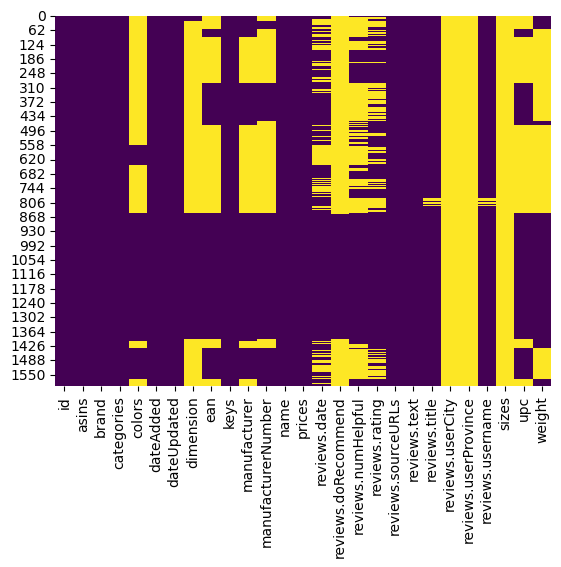

In [6]:
# Heatmap analysis
sns.heatmap(des_data.isnull(),cbar=False,cmap="viridis")   

In [7]:
mn_data.drop(['reviews.userCity','reviews.userProvince','sizes','ean'],inplace=True,axis=1)
mn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1597 non-null   object 
 1   asins                1597 non-null   object 
 2   brand                1597 non-null   object 
 3   categories           1597 non-null   object 
 4   colors               774 non-null    object 
 5   dateAdded            1597 non-null   object 
 6   dateUpdated          1597 non-null   object 
 7   dimension            565 non-null    object 
 8   keys                 1597 non-null   object 
 9   manufacturer         965 non-null    object 
 10  manufacturerNumber   902 non-null    object 
 11  name                 1597 non-null   object 
 12  prices               1597 non-null   object 
 13  reviews.date         1217 non-null   object 
 14  reviews.doRecommend  539 non-null    object 
 15  reviews.numHelpful   900 non-null    f

In [8]:
mn_data.describe()

,reviews.numHelpful,reviews.rating,upc
count,900.000000,1177.000000,8.980000e+02
mean,83.584444,4.359388,8.443135e+11
std,197.150238,1.021445,3.416444e+09
min,0.000000,1.000000,8.416670e+11
25%,0.000000,4.000000,8.416670e+11
50%,0.000000,5.000000,8.416670e+11
75%,34.000000,5.000000,8.487190e+11
max,997.000000,5.000000,8.487190e+11


In [9]:
# from the above output- Avg reviews rating is 4.35. Review that was most helful was to 997 people.

In [10]:
# # Calculate the number of unique asins using .unique() function
unique_asins = len(mn_data['asins'].unique())

# # Print the number of unique asins help of format method
print("Number of Unique asins: {}".format(unique_asins))
print(mn_data['asins'].unique())


Number of Unique asins: 54
['B00QJDU3KY' 'B002Y27P3M' 'B00DU15MU4' 'B01LW1MS9C' 'B01FWSVGQQ'
 'B00DOPNLJ0' 'B00NO8LX7E' 'B00LWHUAF0' 'B00KDRQEYQ' 'B00OQVZDJM'
 'B00QJDVBFU' 'B00VKLBU3Y' 'B010BWYP20' 'B00VKM5NFY' 'B01KIOU4EO'
 'B0117U8JSG' 'B01A08ECQY' 'B01J2G4VBG' 'B00QJDS7I4' 'B00U879XZ8'
 'B010EK1GOE' 'B00LWHUB9A' 'B00ZS0G0PG' 'B01A08E70K' 'B00PD81ETU'
 'B06XDD27LJ' 'B00CX5P8FC' 'B07194GPJV' 'B008GG93YE,B00LWHUBPO,B0051QYGXA'
 'B071NMTDHR' 'B0117U82EM' 'B0711C7WL2' 'B01M3ULMWP' 'B00LWHU9D8'
 'B0716JZKLT' 'B01BRWH8G8' 'B01M4NRFXX' 'B01KVZDFD2' 'B01M4NU4OM'
 'B008GGCAVM,B00DOPNMVM' 'B00KSR13CE' 'B01M71HRMY' 'B01K8B8YA8'
 'B010BWYDYA' 'B01KIOU214' 'B00DOPNK14'
 'B00DOPNO4M,B00BWYQ9YE,B00CYQPMJC,B00CUU1CGY,B00BWYRF7E,B00CYQP3AK'
 'B01BH83OOM' 'B00K5W9WZW' 'B01E9AHU8Q' 'B01HC1S9HU' 'B00HX0SRXW'
 'B00LORGAG6' 'B00NO8JJZW']


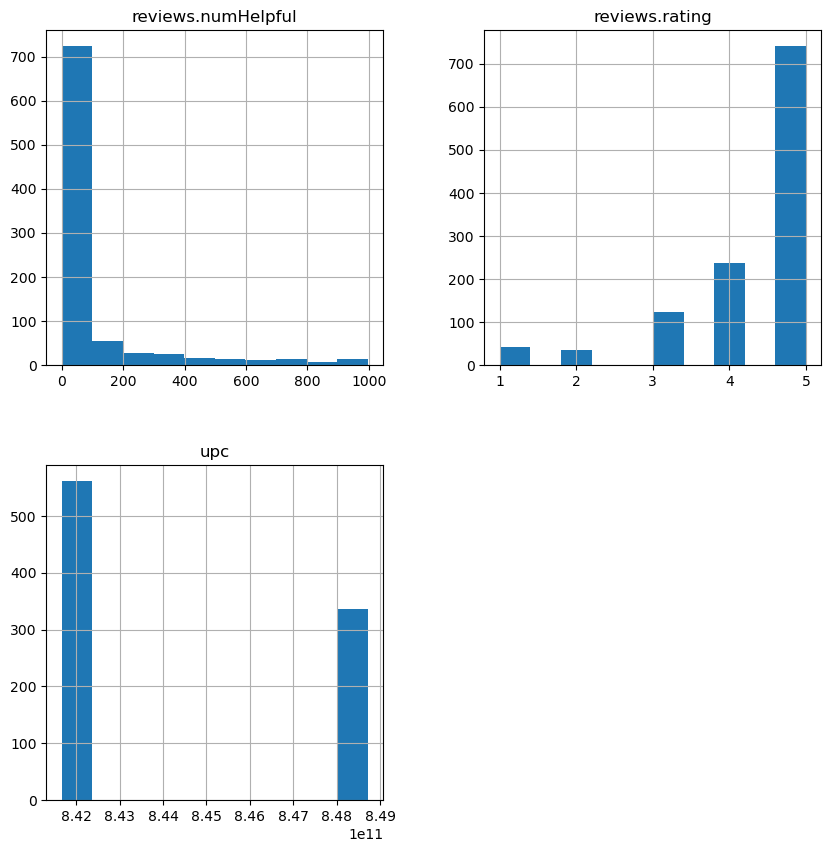

In [11]:
mn_data.hist(figsize=(10,10))
plt.show()

# Train & Test Split with Stratified Shuffle Method

In [12]:
# # Drop the NULL values from the reviews.rating
mn_data_after = mn_data.dropna(subset=['reviews.rating'])

# # Cast the 'reviews.rating' column as integers
mn_data_after['reviews.rating'] = mn_data_after['reviews.rating'].astype(int)

# # Before and after pre-processing - Calculate and print the number of rows 
print(f"Before: {len(mn_data)} \nAfter: {len(mn_data_after)}")


Before: 1597 
After: 1177


C:\Users\Mantosh.Nandy\AppData\Local\Temp\ipykernel_12872\3309294776.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mn_data_after['reviews.rating'] = mn_data_after['reviews.rating'].astype(int)


In [13]:
# By using StratifiedShuffleSplit, start test & train the datasets
split=StratifiedShuffleSplit(n_splits=5,test_size=0.3, random_state=1)
for train_index,test_index in split.split(mn_data_after,mn_data_after["reviews.rating"]):
    strshf_train=mn_data_after.iloc[train_index]
    strshf_test=mn_data_after.iloc[test_index]
strshf_train.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,keys,manufacturer,...,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,upc,weight
1014,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,amazontapalexaenabledportablebluetoothspeaker/...,Amazon,...,2017-02-18T00:00:00.000Z,True,0.0,5,http://reviews.bestbuy.com/3545/5097300/review...,Great sound. Portable. The kids love it. Didn'...,Love it,JohnA,8.416670e+11,1.75 lbs
192,AV1T0-J7vKc47QAVgf2T,B01FWSVGQQ,Amazon,Amazon Devices,NaN,2017-07-18T03:53:01Z,2017-08-13T08:28:54Z,NaN,amazontapslingcoverwhite/b01fwsvgqq,NaN,...,2016-04-01T00:00:00.000Z,NaN,123.0,4,https://www.amazon.com/Amazon-Tap-Sling-Cover-...,I am updating my review from two months ago.. ...,Updated review (after 2 months)...,Jbird,NaN,NaN
464,AVsRjfwAU2_QcyX9PHqe,B01J2G4VBG,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2017-03-27T20:56:09Z,2017-08-13T08:28:46Z,NaN,amazon5wusbofficialoemchargerpoweradapterforfi...,Amazon,...,2017-03-16T00:00:00.000Z,NaN,19.0,4,https://www.amazon.com/Amazon-Official-Charger...,Very expensive charger. I think the kindle sho...,It is a pretty large charger though and doesn'...,Maureen Clement,8.416670e+11,1.6 ounces
982,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,amazontapalexaenabledportablebluetoothspeaker/...,Amazon,...,2017-03-15T00:00:00.000Z,True,0.0,5,http://reviews.bestbuy.com/3545/5097300/review...,This little speaker is way better that her mot...,ALEXA is the best,ricanaustin,8.416670e+11,1.75 lbs
208,AV1T19jBvKc47QAVgf3S,B00OQVZDJM,Amazon,Amazon Devices,NaN,2017-07-18T03:57:20Z,2017-07-18T23:52:58Z,NaN,kindlepaperwhiteereaderblack/b00oqvzdjm,NaN,...,2015-07-01T00:00:00.000Z,NaN,120.0,5,https://www.amazon.com/gp/product/B00OQVZDJM/r...,"Review updated September 17, 2015As a backgrou...","No big improvement in the 2015 model 10,",Desert Rat,NaN,NaN


In [14]:
len(strshf_train) , len(strshf_test)

(823, 354)

In [15]:
# Searching for get percentage of each of the ratings of training dataset

strshf_train["reviews.rating"].value_counts(normalize=True)   # normalized to represent proportions instead of counts.


reviews.rating
5    0.629405
4    0.200486
3    0.105711
1    0.035237
2    0.029162
Name: proportion, dtype: float64

In [16]:
# Searching for get percentage of each of the ratings of test dataset

strshf_test["reviews.rating"].value_counts(normalize=True)    # normalized to represent proportions instead of counts.

reviews.rating
5    0.629944
4    0.200565
3    0.104520
1    0.036723
2    0.028249
Name: proportion, dtype: float64

# Exploratory Data Exploration on Training Data Set

In [17]:
reviews=strshf_train.copy()
reviews.head(2)

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,keys,manufacturer,...,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,upc,weight
1014,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,amazontapalexaenabledportablebluetoothspeaker/...,Amazon,...,2017-02-18T00:00:00.000Z,True,0.0,5,http://reviews.bestbuy.com/3545/5097300/review...,Great sound. Portable. The kids love it. Didn'...,Love it,JohnA,8.416670e+11,1.75 lbs
192,AV1T0-J7vKc47QAVgf2T,B01FWSVGQQ,Amazon,Amazon Devices,NaN,2017-07-18T03:53:01Z,2017-08-13T08:28:54Z,NaN,amazontapslingcoverwhite/b01fwsvgqq,NaN,...,2016-04-01T00:00:00.000Z,NaN,123.0,4,https://www.amazon.com/Amazon-Tap-Sling-Cover-...,I am updating my review from two months ago.. ...,Updated review (after 2 months)...,Jbird,NaN,NaN


In [18]:
len(reviews['name'].unique()),len(reviews['asins'].unique())

(62, 54)

In [19]:
reviews.groupby('asins')['name'].unique()

asins
B002Y27P3M                                                                                           [Kindle Keyboard]
B008GG93YE,B00LWHUBPO,B0051QYGXA                                                                              [Kindle]
B008GGCAVM,B00DOPNMVM                                                                              [Kindle Fire HD 7"]
B00CX5P8FC                                                                                            [Amazon Fire TV]
B00DOPNK14                                                                                         [Kindle Paperwhite]
B00DOPNLJ0                                                                                      [Kindle Fire HDX 8.9"]
B00DOPNO4M,B00BWYQ9YE,B00CYQPMJC,B00CUU1CGY,B00BWYRF7E,B00CYQP3AK                                 [Kindle Fire HDX 7"]
B00DU15MU4                                                           [Certified Refurbished Amazon Fire TV (Previou...
B00HX0SRXW                                

In [20]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 823 entries, 1014 to 931
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   823 non-null    object 
 1   asins                823 non-null    object 
 2   brand                823 non-null    object 
 3   categories           823 non-null    object 
 4   colors               468 non-null    object 
 5   dateAdded            823 non-null    object 
 6   dateUpdated          823 non-null    object 
 7   dimension            384 non-null    object 
 8   keys                 823 non-null    object 
 9   manufacturer         508 non-null    object 
 10  manufacturerNumber   485 non-null    object 
 11  name                 823 non-null    object 
 12  prices               823 non-null    object 
 13  reviews.date         666 non-null    object 
 14  reviews.doRecommend  373 non-null    object 
 15  reviews.numHelpful   615 non-null    float

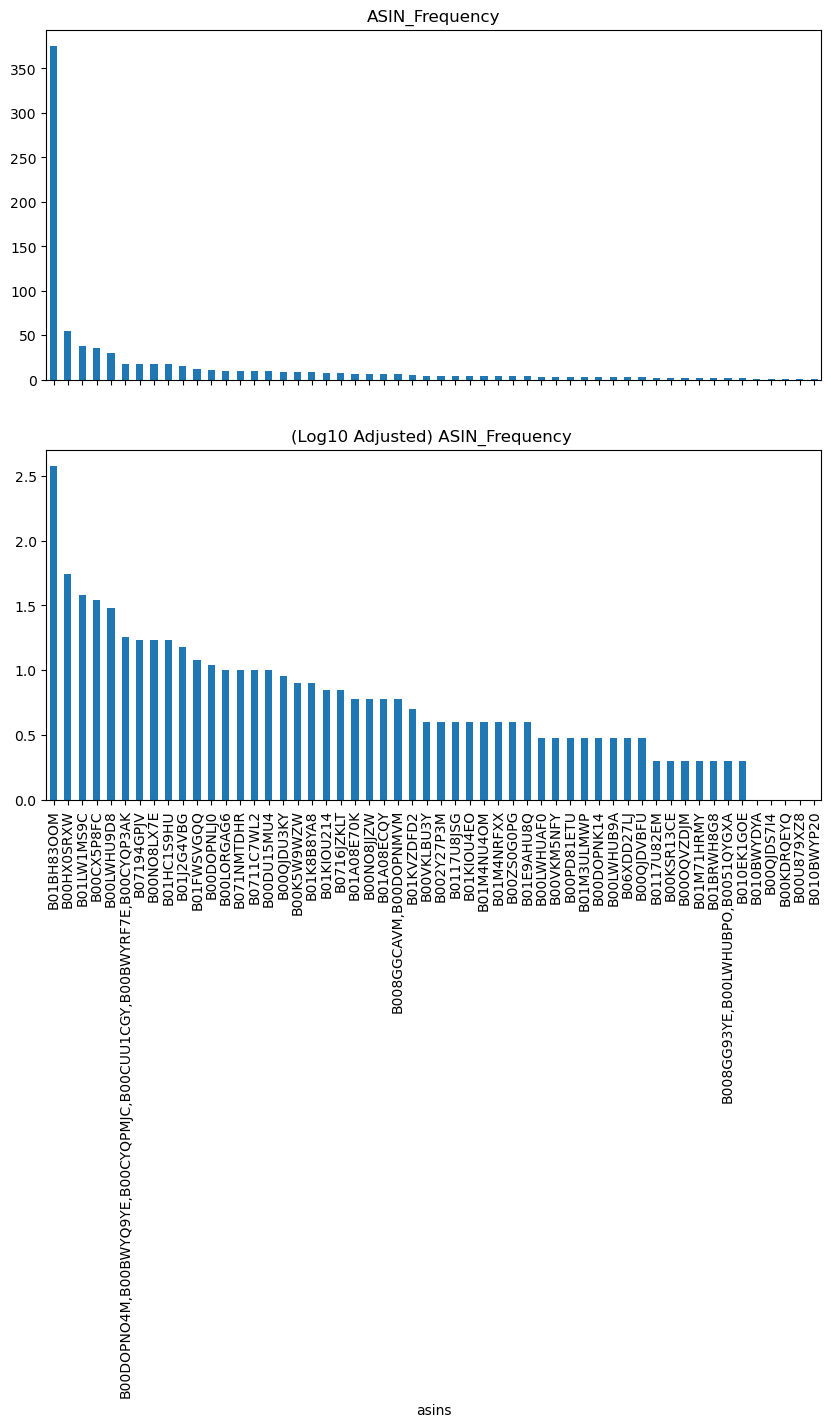

In [21]:
fig = plt.figure(figsize=(10,10))
# we use subplot when we have to see interrelationship btw two graphs
axis1 = plt.subplot(2,1,1)
axis2 = plt.subplot(2,1,2, sharex = axis1)
reviews["asins"].value_counts().plot(kind="bar", ax=axis1, 
                                     title="ASIN_Frequency")

np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=axis2, 
                                     title="(Log10 Adjusted) ASIN_Frequency ") 
# np.log10 normalises our data to visualise the graph and difference much better
plt.show()

In [22]:
# mean of rating from trianing data set 
reviews['reviews.rating'].mean()


4.359659781287971

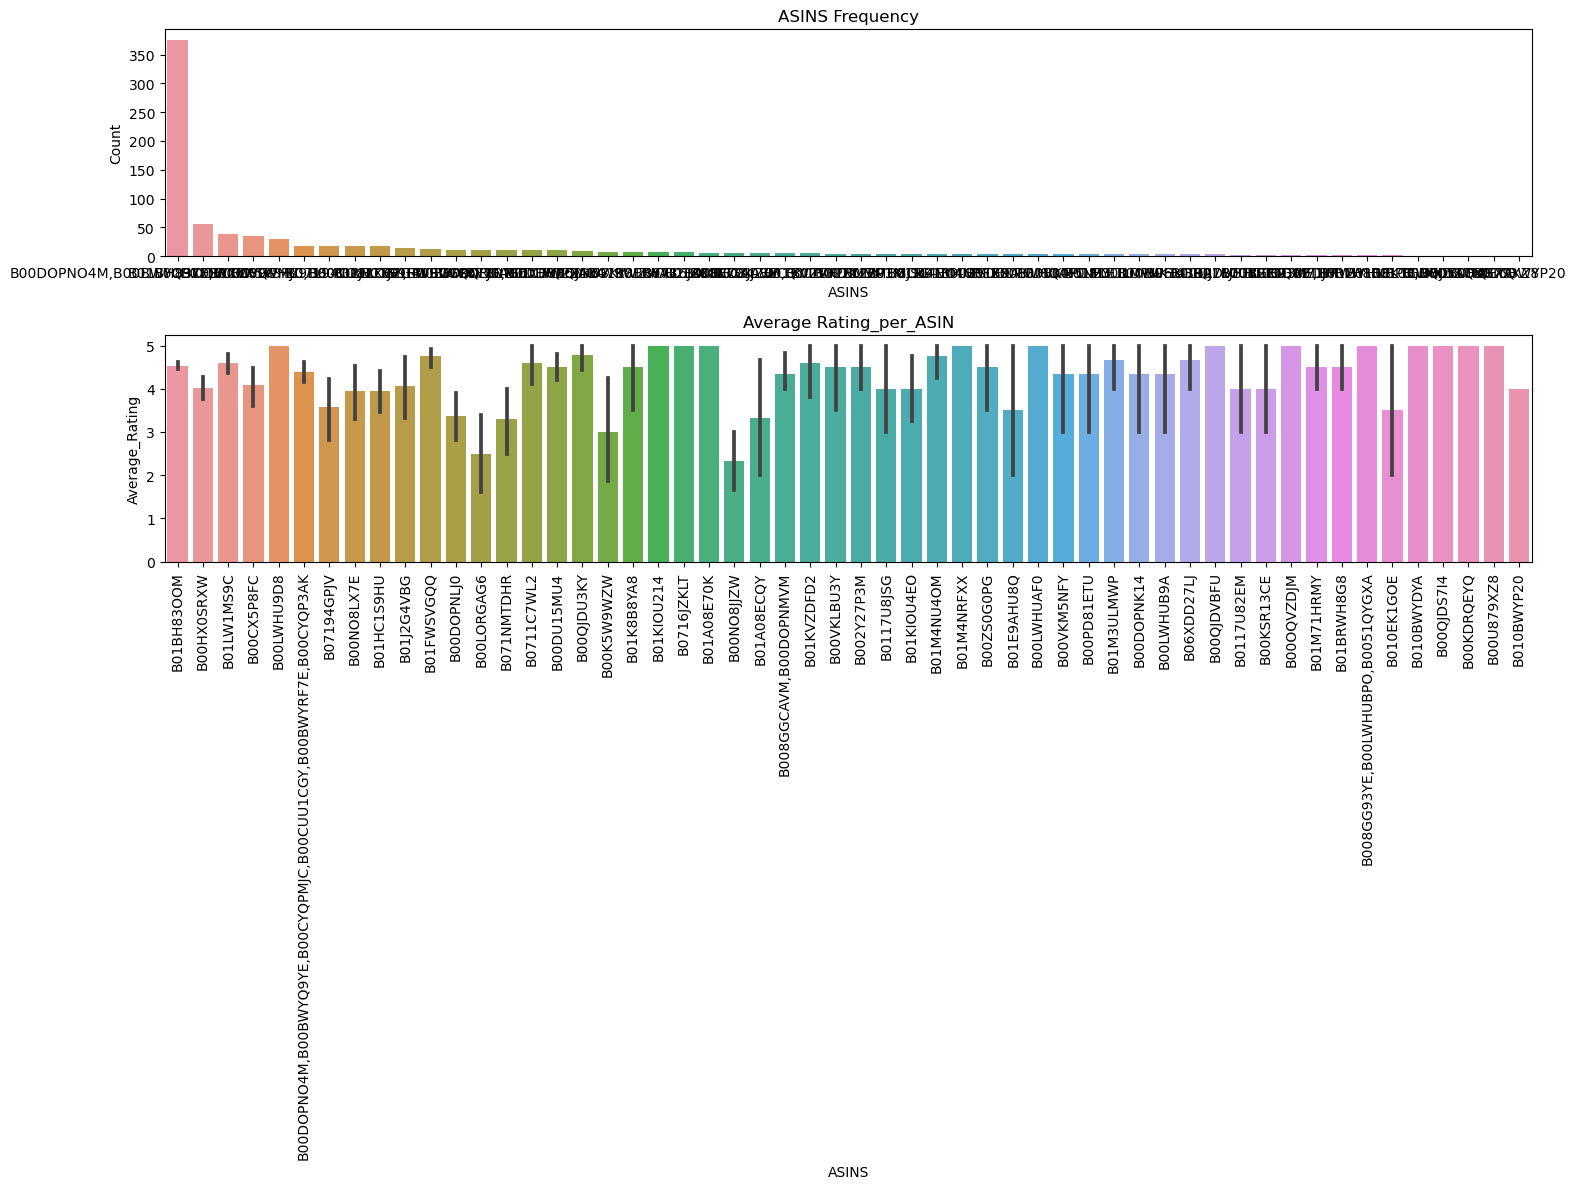

In [23]:
# Using barplot to display number of people giving ratings
count_asins=reviews['asins'].value_counts().index

# Settng up subplots
fig, axes = plt.subplots(2, 1, figsize=(16,12))

# Plotting ASINS frequency
sns.countplot(x='asins', data=reviews, order=count_asins, ax=axes[0])
axes[0].set_title('ASINS Frequency')
axes[0].set_xlabel('ASINS')
axes[0].set_ylabel('Count')

# Plotting average rating per ASIN
sns.barplot(x='asins', y='reviews.rating', data=reviews, order=count_asins, ax=axes[1])
axes[1].set_title('Average Rating_per_ASIN')
axes[1].set_xlabel('ASINS')
axes[1].set_ylabel('Average_Rating')
axes[1].tick_params(axis='x', rotation=90)

# Show plot
plt.tight_layout()
plt.show()


# Reviews or Based on Recommendation Products Selling Strategy

C:\Users\Mantosh.Nandy\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Mantosh.Nandy\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


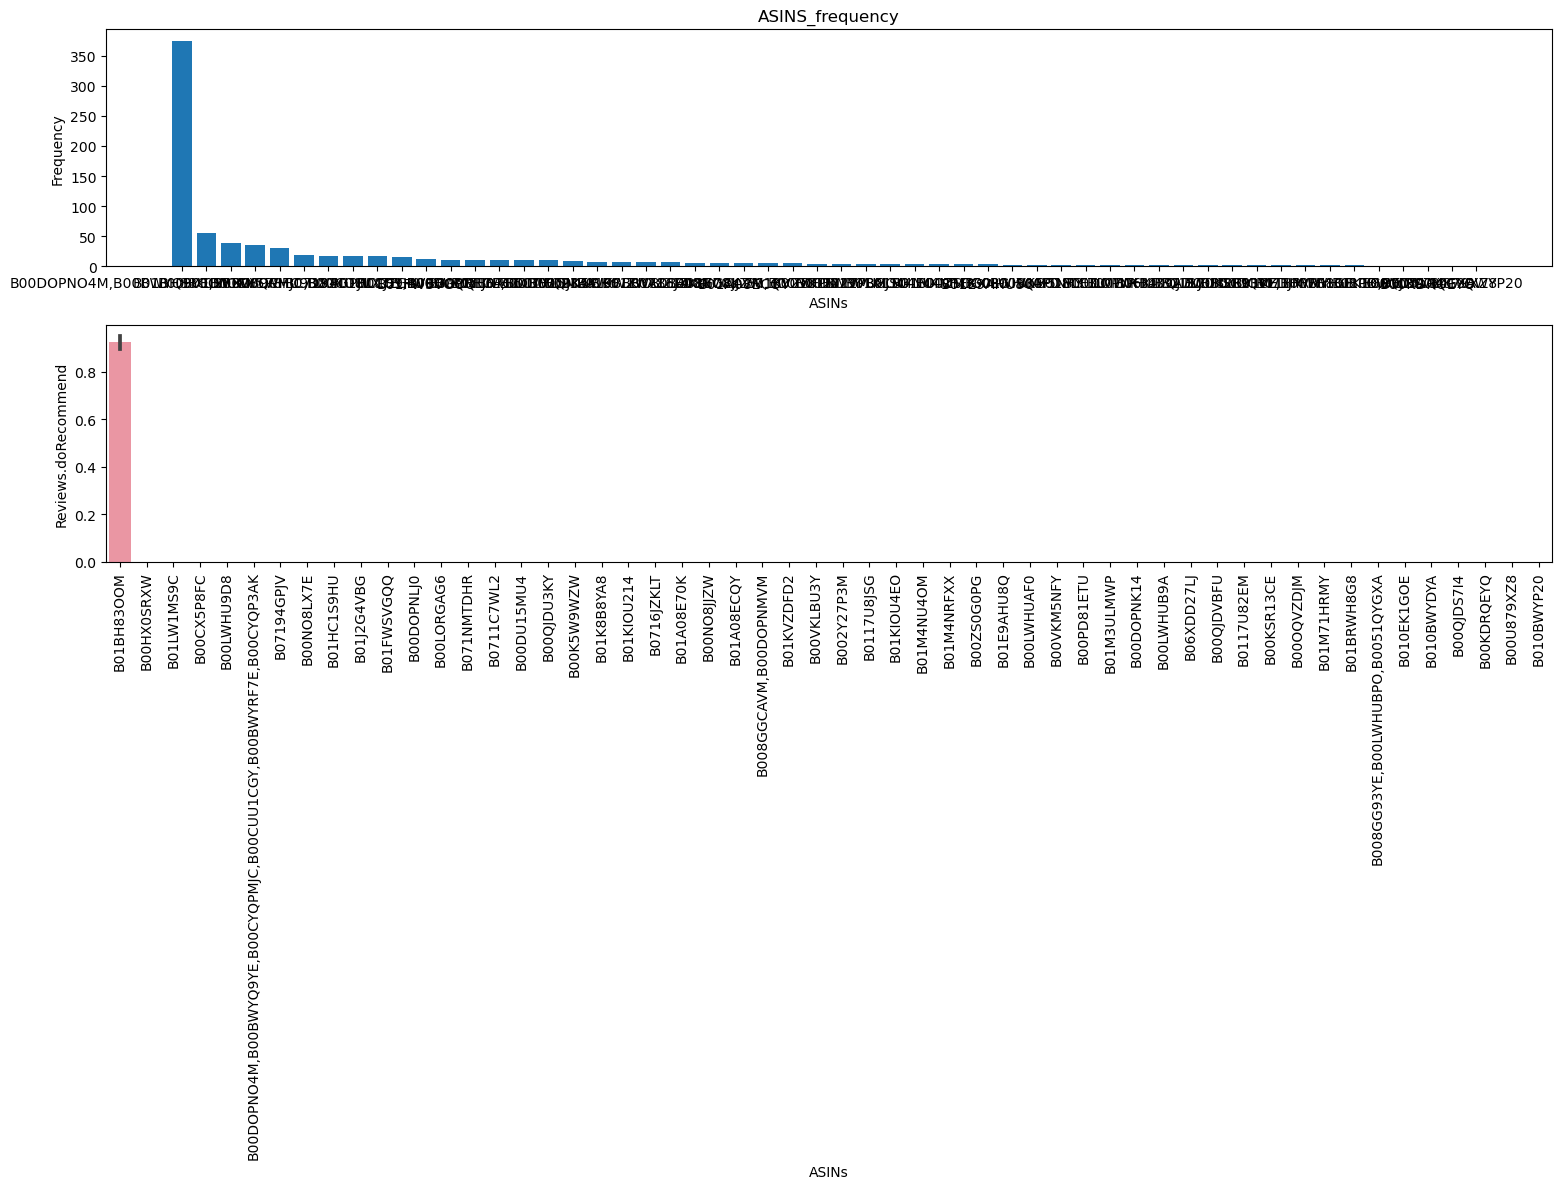

In [24]:

asins_count = reviews['asins'].value_counts()

fig, ax1 = plt.subplots(2, 1, figsize=(16,12))

ax1[0].bar(asins_count.index, asins_count.values)
ax1[0].set_title('ASINS_frequency')
ax1[0].set_xlabel('ASINs')
ax1[0].set_ylabel('Frequency')

sns.barplot(x="asins", y="reviews.doRecommend", data=reviews, order=asins_count.index, ax=ax1[1])
ax1[1].set_xlabel('ASINs')
ax1[1].set_ylabel('Reviews.doRecommend')
ax1[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [25]:

reviews_counts = reviews['asins'].value_counts().reset_index()
reviews_counts.columns = ['asins', 'counts']

avg_revs_rating = reviews.groupby("asins")['reviews.rating'].mean().reset_index()
avg_revs_rating.columns = ['asins', 'avg_revs_rating']

result = pd.merge(reviews_counts, avg_revs_rating, on='asins')

print(result)


                                                asins  counts  avg_revs_rating
0                                          B01BH83OOM     375         4.536000
1                                          B00HX0SRXW      55         4.018182
2                                          B01LW1MS9C      38         4.605263
3                                          B00CX5P8FC      35         4.085714
4                                          B00LWHU9D8      30         5.000000
5   B00DOPNO4M,B00BWYQ9YE,B00CYQPMJC,B00CUU1CGY,B0...      18         4.388889
6                                          B07194GPJV      17         3.588235
7                                          B00NO8LX7E      17         3.941176
8                                          B01HC1S9HU      17         3.941176
9                                          B01J2G4VBG      15         4.066667
10                                         B01FWSVGQQ      12         4.750000
11                                         B00DOPNLJ

# # Sentiment Analysis 

In [26]:
# 'mapping' dictionary helps to indicate the keys are the rating values and the values are the corresponding sentiments.
def sentiments(rating):                       # declare sentiments function
    mapping = {5: "Positive", 4: "Positive", 3: "Neutral", 2: "Negative", 1: "Negative"}
    return mapping.get(rating, "Unknown")     #  get() method to retrieve the sentiment corresponding to the given rating. 
                                              #  absence of rating in the dictionary, it returns "Unknown".

In [27]:
# Call sentiments function to training and testing dataset
strshf_train['Sentiments']=strshf_train['reviews.rating'].apply(sentiments)
strshf_test['Sentiments']=strshf_test['reviews.rating'].apply(sentiments)

strshf_train["Sentiments"][:20]

C:\Users\Mantosh.Nandy\AppData\Local\Temp\ipykernel_12872\2614189534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strshf_train['Sentiments']=strshf_train['reviews.rating'].apply(sentiments)
C:\Users\Mantosh.Nandy\AppData\Local\Temp\ipykernel_12872\2614189534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strshf_test['Sentiments']=strshf_test['reviews.rating'].apply(sentiments)


1014    Positive
192     Positive
464     Positive
982     Positive
208     Positive
1424     Neutral
1489    Positive
1546     Neutral
1510     Neutral
649     Positive
1573     Neutral
1420    Positive
478      Neutral
1377    Positive
1389    Positive
493     Negative
108     Negative
1086    Positive
961     Positive
1260     Neutral
Name: Sentiments, dtype: object

# Preparing text data

In [28]:
# Define variables
x_trn, x_trn_targetsentiment = strshf_train['reviews.text'], strshf_train['Sentiments']
x_tst, x_tst_targetsentiment = strshf_test['reviews.text'], strshf_test['Sentiments']

# Print lengths
print(len(x_trn), len(x_tst))

823 354


# Extracting features i.e., tokenizations , stopwords 

In [29]:
# tokenisation involves breaks sentences into individual words
# stopwords: filtering unwanted words like the ,are , of ,is etc.

x_trn=x_trn.fillna(' ')               # filling na with space 
x_tst=x_tst.fillna(' ')
x_trn_targetsentiment=x_trn_targetsentiment.fillna(' ')
x_tst_targetsentiment=x_tst_targetsentiment.fillna(' ')

In [30]:
# Using count vectorizer counting Text preprocessing and occurence 

from sklearn.feature_extraction.text import CountVectorizer

# Fit and transform the x_trn data
count_vector = CountVectorizer()
x_trn_counts = count_vector.fit_transform(x_trn)

# Print the shape of the matrix
print(x_trn_counts.shape)          # it dislays how many samples and how many distinct words has

(823, 4763)


In [31]:
# Using tfidf transformer for reduces less meaning words which have higher occurence

from sklearn.feature_extraction.text import TfidfVectorizer      # Downscales stop words like "the" "are" etc.

# Create a TfidfVectorizer instance
tfidf_vectorizer = TfidfVectorizer(use_idf=False)

# Fit-transform the training data
x_trn_tfidf = tfidf_vectorizer.fit_transform(x_trn)

# Get the shape of the transformed training data
x_trn_tfidf.shape

(823, 4763)

In [32]:
from sklearn.naive_bayes import MultinomialNB             # Using Naive Bayes Algorithm
from sklearn.pipeline import Pipeline                     # for multiple preprocessing steps before feeding data into a final model
from sklearn.feature_extraction.text import TfidfTransformer   # helping to represent text data in a format that is suitable for ML algorithms

# Declare the pipeline
data_multiNB_pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf_nominalNB', MultinomialNB())
]) # using pipeline from sklearn helps a number of tasks to be implemented on every datapoint. 
   # also be used when to implement multiple models on dataset in sequential manner

# Fit the pipeline on the training data
data_multiNB_pipe.fit(x_trn, x_trn_targetsentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

In [33]:
prediction_multiNB=data_multiNB_pipe.predict(x_tst)
prediction_multiNB

array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Neutral',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positiv

In [34]:
# Perform accuracy using MultinomialNB model

from sklearn.metrics import accuracy_score       
print("Accuracy: {}".format(accuracy_score(x_tst_targetsentiment,prediction_multiNB)))

Accuracy: 0.8615819209039548


In [35]:
x_tst

3       I bought one of the first Paperwhites and have...
80      I am not a casual user of on-demand content an...
500     I got my first Kindle. This is a nice ebook re...
534     In this day and age of rectangles with screens...
101     This is perfect. A lot of people were commenti...
                              ...                        
1559    While I've purchased items from Amazon for yea...
454     According to the info, the Paperwhite charges ...
381     First I would like to say that I am coming fro...
1287    I have the Echo and I just love it... I bought...
698     Love it! I purchased this as I have had audibl...
Name: reviews.text, Length: 354, dtype: object

# Applying model on input text

In [36]:
 # Perform accuracy based on Linear Support Vector Classifier

from sklearn.svm import LinearSVC     
text_clf = Pipeline([("vect", CountVectorizer()), 
                               ("tfidf", TfidfTransformer()),
                               ("clf_linearSVC", LinearSVC())])
text_clf.fit(x_trn, x_trn_targetsentiment)

predicted_LinearSVC = text_clf.predict(x_tst)      
print('Accuracy: {}'. format(accuracy_score(x_tst_targetsentiment, predicted_LinearSVC)))

C:\Users\Mantosh.Nandy\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.884180790960452


In [37]:
test_text=["it works well it takes time for it to know you",
            "Built on Android does not mean you can",
              "I will not recomend this porduct",
          ]
text_clf.predict(test_text)

array(['Positive', 'Positive', 'Negative'], dtype=object)